In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import sklearn as sklearn

In [77]:
ds = pd.read_csv('/Users/user/Documents/projects/Airline Delays/cleaned_dataset.csv')

In [9]:
import os
print(os.getcwd())

/Users/user/Desktop


In [10]:
ds.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,delay_rate,arr_cancelled,...,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,6,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",90.0,26.0,0.288889,4.0,...,8.63,3.24,4.41,0.0,9.72,561.0,223.0,282.0,0.0,818.0
1,2025,6,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",5.0,1.0,0.200000,0.0,...,0.00,0.00,0.00,0.0,1.00,0.0,0.0,0.0,0.0,124.0
2,2025,6,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",69.0,23.0,0.333333,2.0,...,7.21,1.82,8.65,0.0,5.32,981.0,54.0,294.0,0.0,369.0
3,2025,6,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",155.0,43.0,0.277419,9.0,...,12.78,2.69,10.34,0.0,17.19,827.0,198.0,517.0,0.0,1335.0
4,2025,6,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",86.0,29.0,0.337209,4.0,...,9.32,0.00,4.07,0.0,15.61,638.0,0.0,194.0,0.0,1102.0


In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69902 entries, 0 to 69901
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 69902 non-null  int64  
 1   month                69902 non-null  int64  
 2   carrier              69902 non-null  object 
 3   carrier_name         69902 non-null  object 
 4   airport              69902 non-null  object 
 5   airport_name         69902 non-null  object 
 6   arr_flights          69902 non-null  float64
 7   arr_del15            69902 non-null  float64
 8   delay_rate           69902 non-null  float64
 9   arr_cancelled        69902 non-null  float64
 10  cancel_rate          69902 non-null  float64
 11  arr_diverted         69902 non-null  float64
 12  arr_delay            69902 non-null  float64
 13  carrier_ct           69902 non-null  float64
 14  weather_ct           69902 non-null  float64
 15  nas_ct               69902 non-null 

In [13]:
print(ds.describe())

               year         month   arr_flights     arr_del15    delay_rate  \
count  69902.000000  69902.000000  69902.000000  69902.000000  69902.000000   
mean    2023.458656      6.483906    326.043818     66.777360      0.205076   
std        0.977757      3.406944    943.646142    192.601049      0.118235   
min     2022.000000      1.000000      1.000000      0.000000      0.000000   
25%     2023.000000      4.000000     40.000000      7.000000      0.129032   
50%     2023.000000      6.000000     88.000000     17.000000      0.192308   
75%     2024.000000      9.000000    214.000000     46.000000      0.265449   
max     2025.000000     12.000000  21175.000000   5544.000000      1.000000   

       arr_cancelled   cancel_rate  arr_diverted      arr_delay    carrier_ct  \
count   69902.000000  69902.000000  69902.000000   69902.000000  69902.000000   
mean        5.048010      0.015999      0.815198    4737.181182     22.027259   
std        24.541879      0.034391      3.686

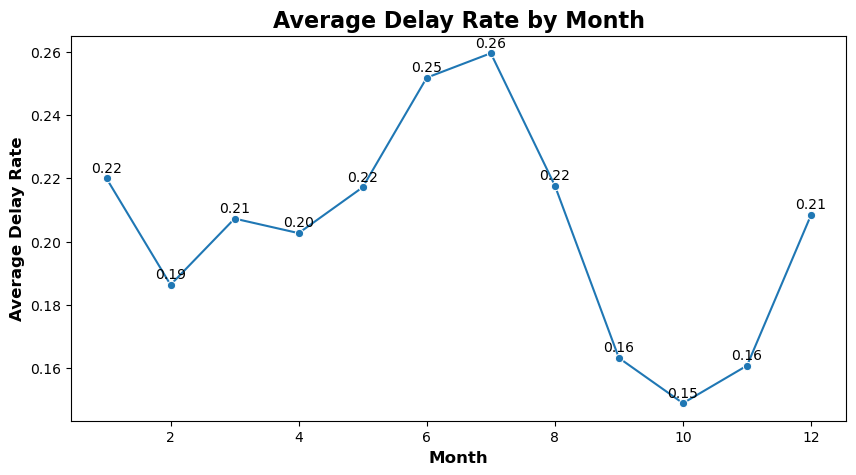

In [78]:
monthly_delay = ds.groupby('month')['delay_rate'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_delay.index, y=monthly_delay.values, marker='o')
for x, y in zip(monthly_delay.index, monthly_delay.values):
    plt.text(x, y + 0.002, f'{y:.2f}', ha='center', fontsize=10, color='black')
plt.title('Average Delay Rate by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Average Delay Rate', fontsize=12, fontweight='bold')
plt.savefig('/Users/user/Documents/projects/Airline Delays/airline_delays/avg_delay_by_month.png', dpi=300, bbox_inches='tight')
plt.show()

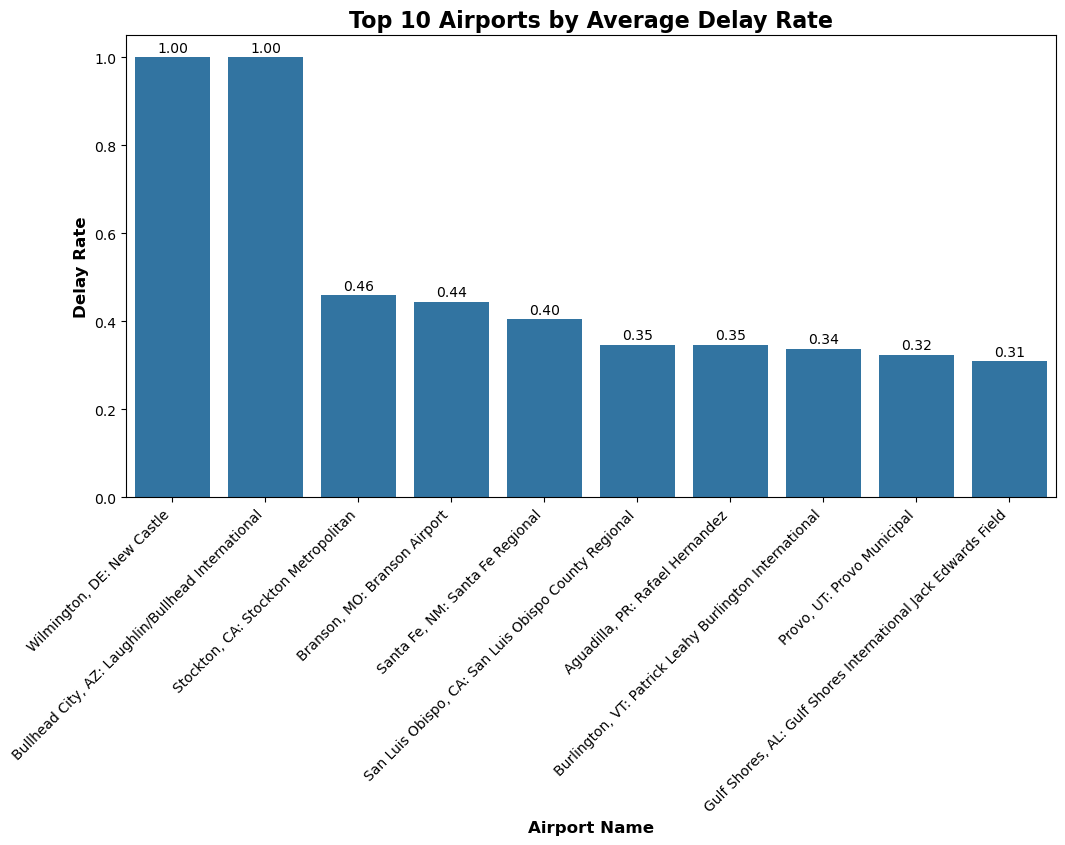

In [79]:
top_airports = ds.groupby('airport_name')['delay_rate'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_airports.index, y=top_airports.values)
for i, value in enumerate(top_airports):
    plt.text(i, value + 0.013, f'{value:.2f}', ha='center', fontsize=10, color='black')
plt.title('Top 10 Airports by Average Delay Rate', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Delay Rate', fontsize=12, fontweight='bold')
plt.xlabel('Airport Name', fontsize=12, fontweight='bold')
plt.savefig('/Users/user/Documents/projects/Airline Delays/airline_delays/airport_by_avg_delay.png', dpi=300, bbox_inches='tight')
plt.show()

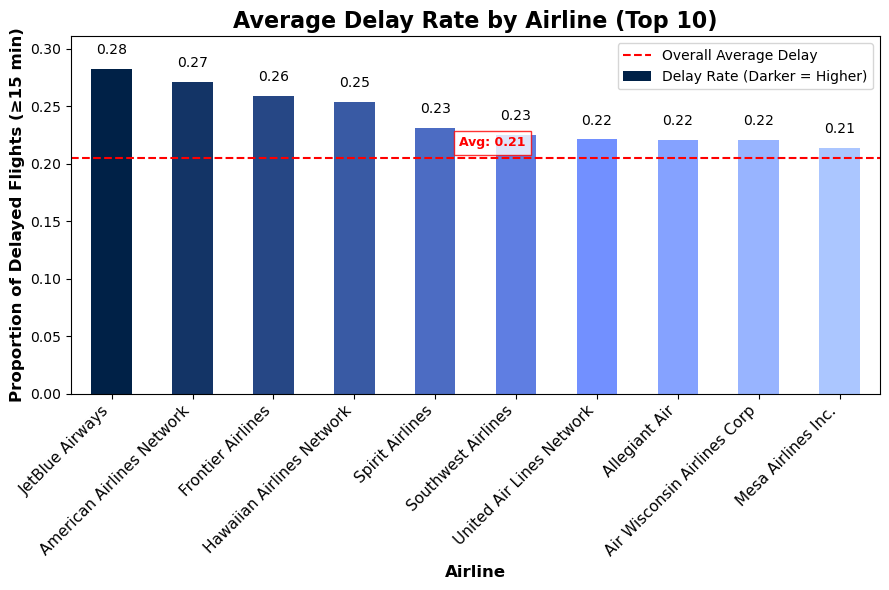

In [81]:
carrier_delays = ds.groupby('carrier_name')['delay_rate'].mean().sort_values(ascending=False).head(10)
top_carriers = carrier_delays.head(10)

plt.figure(figsize=(9, 6))
colors = [
    '#002147', 
    '#133466',
    '#264785',
    '#395AA4',
    '#4C6CC3',
    '#5F7EE2',
    '#7290FF',
    '#85A2FF',
    '#98B4FF',
    '#ABC6FF'  
]
top_carriers.plot(kind='bar', color= colors, label='Delay Rate (Darker = Higher)')
plt.title('Average Delay Rate by Airline (Top 10)', fontsize=16, fontweight='bold')
plt.xlabel('Airline', fontsize=12, fontweight='bold')
plt.ylabel('Proportion of Delayed Flights (≥15 min)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
# Add overall average delay line
overall_avg_delay = ds['delay_rate'].mean()
plt.axhline(y=overall_avg_delay, color='red', linestyle='--', label='Overall Average Delay')
# Add text annotation for the average delay
plt.text(x=4.3, y=overall_avg_delay + 0.01, s=f'Avg: {overall_avg_delay:.2f}', 
         color='red', fontsize=9, fontweight='bold', 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'))
# Add delay rate values above each bar
for i, value in enumerate(top_carriers):
    plt.text(i, value + 0.013, f'{value:.2f}', ha='center', fontsize=10, color='black')
    
plt.legend()
plt.margins(x=0.3, y=0.1) 
plt.tight_layout()  
plt.savefig('/Users/user/Documents/projects/Airline Delays/airline_delays/carrier_delays.png', dpi=300, bbox_inches='tight')
plt.show()

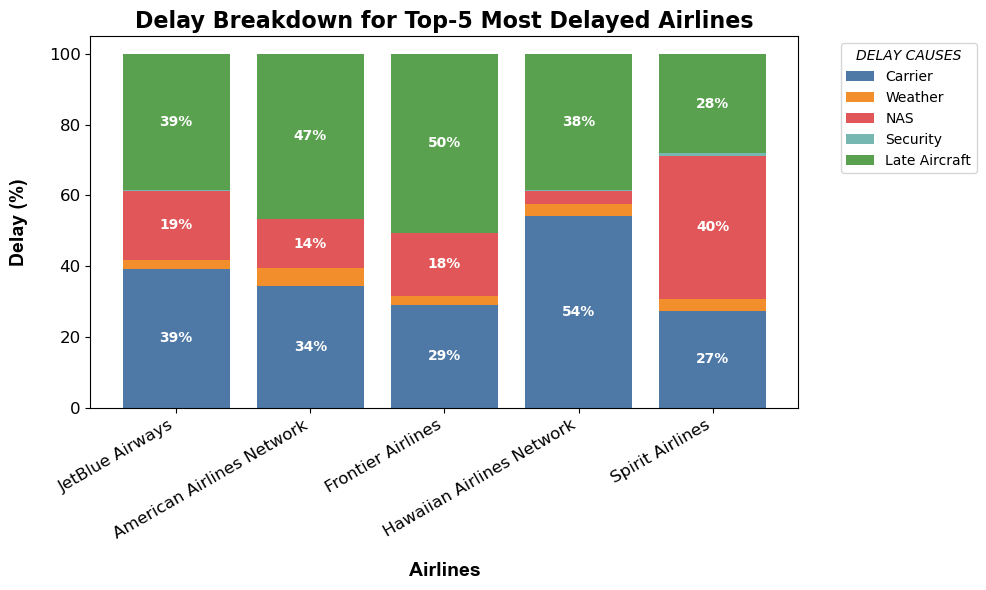

In [82]:
carrier_agg = ds.groupby(['carrier','carrier_name']).agg({
'delay_rate':'mean',
'arr_flights':'mean',
'carrier_delay': 'sum',
'weather_delay': 'sum',
'nas_delay': 'sum',
'security_delay': 'sum',
'late_aircraft_delay': 'sum'
}).reset_index()

top_5 = carrier_agg.sort_values('delay_rate', ascending=False).head(5)

delay_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
top_5['total_delays'] = top_5[delay_cols].sum(axis=1)
for col in delay_cols:
    top_5[col + '_pct'] = top_5[col]/top_5['total_delays'] * 100
pct_cols = [col + '_pct' for col in delay_cols]

plt.figure(figsize= (10,6))
ax = plt.gca()
colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F']
labels = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
bottom = [0] * len(top_5)
for i, col in enumerate(pct_cols):
    bars = plt.bar(
        top_5['carrier_name'], 
        top_5[col],
        bottom=bottom,
        color=colors[i],
        label=labels[i]
    )

    
    for j, bar in enumerate(bars):
        height = top_5.iloc[j][col]
        if height > 8:  
            plt.text(
                bar.get_x() + bar.get_width()/2,
                bottom[j] + height/2,
                f"{height:.0f}%",
                ha='center', va='center',
                color='white', fontsize=10, fontweight='bold'
            )

    for j in range(len(bottom)):
        bottom[j] += top_5.iloc[j][col]

    plt.title('Delay Breakdown for Top-5 Most Delayed Airlines', fontsize=16, fontweight='bold')
plt.ylabel('Delay (%)', fontname='Arial', fontsize=14, fontweight='bold', labelpad=15)
plt.xlabel('Airlines', fontname='Arial', fontsize=14, fontweight='bold', labelpad=15)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)
legend = plt.legend(title='DELAY CAUSES', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_title().set_fontstyle('italic')
plt.tight_layout()
plt.savefig('/Users/user/Documents/projects/Airline Delays/airline_delays/Delay_Causes_Top_5.png')
plt.show()


In [84]:
monthly_flights_year = ds.groupby(['month', 'year'])['arr_flights'].mean().reset_index()
top5_per_year = monthly_flights_year.groupby('year').apply(lambda x: x.sort_values('arr_flights', ascending=False).head(5))
print(top5_per_year)

         month  year  arr_flights
year                             
2022 19      7  2022   330.550214
     22      8  2022   325.198198
     28     10  2022   314.154090
     34     12  2022   307.127456
     15      6  2022   305.302738
2023 29     10  2023   344.838850
     23      8  2023   343.106109
     20      7  2023   342.074411
     12      5  2023   328.694030
     6       3  2023   325.877314
2024 21      7  2024   362.510445
     24      8  2024   349.914725
     30     10  2024   349.831023
     13      5  2024   341.086134
     17      6  2024   339.125390
2025 14      5  2025   357.188871
     8       3  2025   346.860720
     18      6  2025   345.910210
     11      4  2025   345.353351
     2       1  2025   312.637265


/var/folders/8r/w2tfcf3d63b2dfp05x4fmyx40000gn/T/ipykernel_16123/180015288.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_per_year = monthly_flights_year.groupby('year').apply(lambda x: x.sort_values('arr_flights', ascending=False).head(5))


In [85]:
ds['carrier_avg_delay'] = ds.groupby('carrier_name')['delay_rate'].transform('mean')
ds['month_sin'] = np.sin(2 * np.pi * ds['month'] / 12)
ds['month_cos'] = np.cos(2 * np.pi * ds['month'] / 12)
ds['airport_size'] = ds.groupby('airport_name')['arr_flights'].transform('mean')
ds['is_holiday_season'] = ds['month'].apply(lambda x: 1 if x in [11, 12] else 0)

In [86]:
ds['delayed_flag'] = ds['delay_rate'].apply(lambda x: 1 if x >= 0.2 else 0)
y = ds['delayed_flag']
ds['arr_flights_log'] = np.log1p(ds['arr_flights'])
num_features = ['month_sin', 'month_cos', 'arr_flights_log', 'cancel_rate', 
                'airport_size', 'carrier_avg_delay', 'is_holiday_season']
cat_features = ['airport', 'carrier']

X_cat = pd.get_dummies(ds[cat_features], drop_first=True)

X = pd.concat([ds[num_features], X_cat], axis=1)


In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      7360
           1       0.67      0.62      0.64      6621

    accuracy                           0.68     13981
   macro avg       0.67      0.67      0.67     13981
weighted avg       0.67      0.68      0.67     13981

ROC-AUC: 0.7406515131367257


/opt/anaconda3/envs/pandas/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


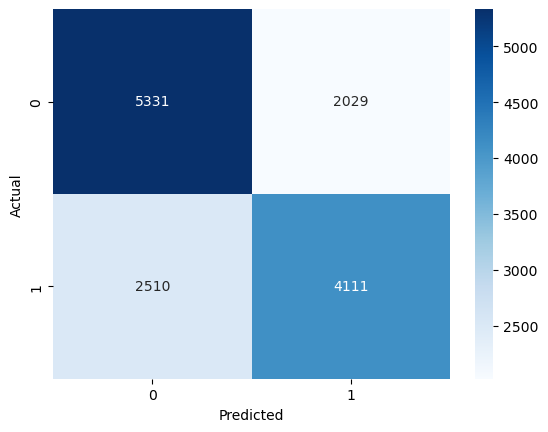

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

lr = LogisticRegression(random_state=42)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_prob))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73      7360
           1       0.72      0.58      0.64      6621

    accuracy                           0.69     13981
   macro avg       0.70      0.69      0.69     13981
weighted avg       0.70      0.69      0.69     13981



In [91]:
importances = rf.feature_importances_
features = X.columns

fi_df = pd.DataFrame({'feature': features, 'importance': importances})
fi_df.sort_values(by='importance', ascending=False).head(10)

,feature,importance
5,carrier_avg_delay,0.172092
3,cancel_rate,0.166724
1,month_cos,0.139042
0,month_sin,0.090212
383,carrier_AA,0.064255
2,arr_flights_log,0.047844
385,carrier_B6,0.040537
388,carrier_F9,0.031463
4,airport_size,0.028052
401,carrier_YX,0.025869


In [92]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_gb))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73      7360
           1       0.70      0.65      0.67      6621

    accuracy                           0.70     13981
   macro avg       0.70      0.70      0.70     13981
weighted avg       0.70      0.70      0.70     13981

ROC-AUC: 0.776035530886573


In [37]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [93]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score


xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)


xgb.fit(X_train, y_train)


y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]


print(classification_report(y_test, y_pred_xgb))


roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print("ROC-AUC:", roc_auc_xgb)


              precision    recall  f1-score   support

           0       0.72      0.76      0.74      7360
           1       0.72      0.66      0.69      6621

    accuracy                           0.72     13981
   macro avg       0.72      0.71      0.71     13981
weighted avg       0.72      0.72      0.72     13981

ROC-AUC: 0.7969036883631133


<Figure size 1200x800 with 0 Axes>

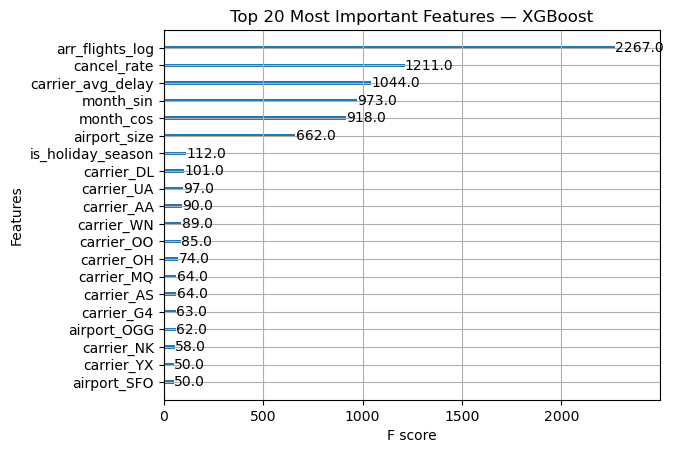

In [94]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_importance(xgb, max_num_features=20)  
plt.title("Top 20 Most Important Features — XGBoost")
plt.show()

In [97]:
!pip install shap
import shap



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.2/559.2 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.1/31.1 MB 33.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [shap]5/6 [shap]]te]


In [100]:
X_clean = X.copy()

X_clean = X_clean.astype(float)

explainer = shap.Explainer(xgb, X_clean)
shap_values = explainer(X_clean)

100%|===================| 69776/69902 [05:04<00:00]        

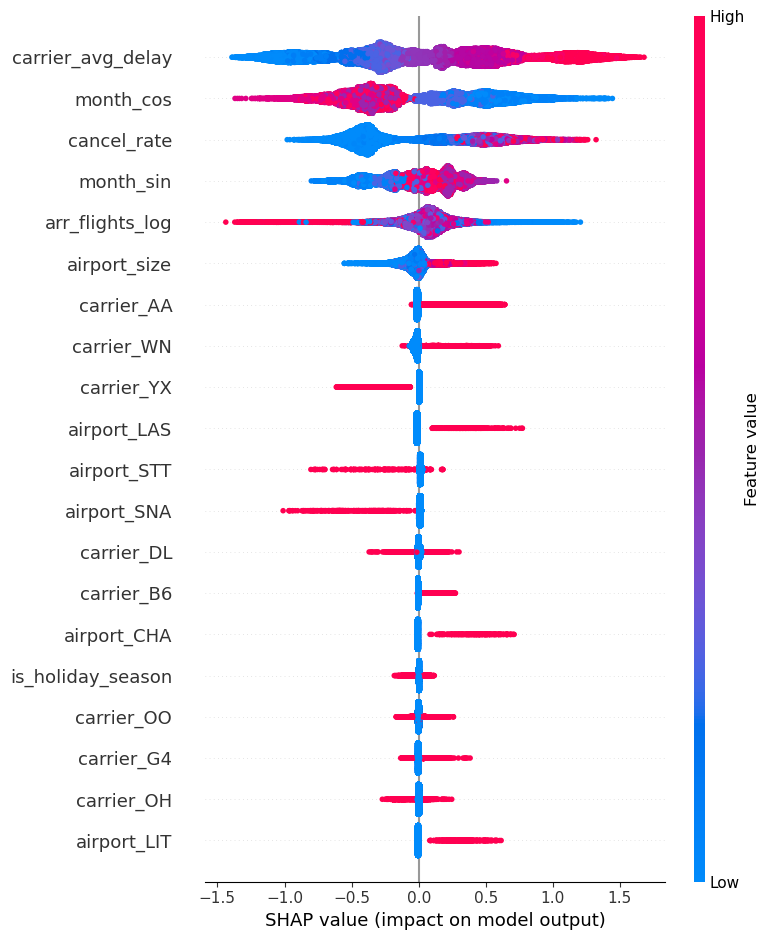

In [101]:
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X)

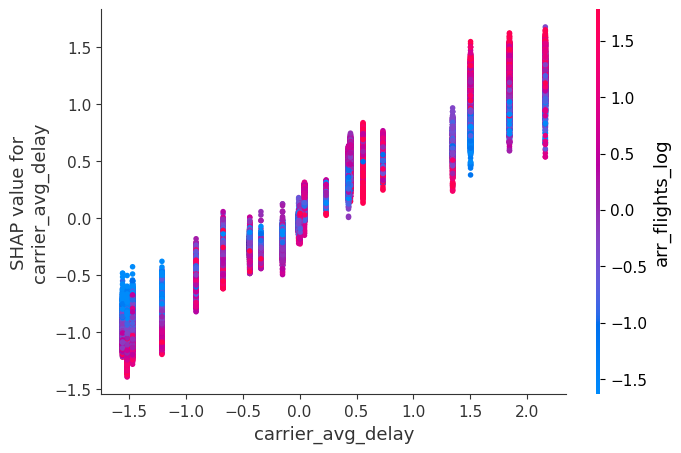

In [102]:
shap.dependence_plot('carrier_avg_delay', shap_values.values, X)